In [16]:
%load_ext autoreload
%autoreload 2

# --- imports --

import importlib
import radial_functions as radial

# Reload functions to ensure we have the latest version
importlib.reload(radial)



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2 A system with radial symmetry

We consider the radial equation:
$$
\dot r=\mu r+r^3-r^5 \;=\; r(\mu+r^2-r^4)
$$
with $\mu\in\mathbb{R}$ the parameter of the system.

Viewed as a 1D dynamical system in $r\ge 0$, the goal is to find the equilibria $r_{eq}$, classify their stability from the sign of $f'(r_{eq})$, and determine for which values of $\mu$ the number and stability of equilibria change, i.e. identify the bifurcations.

To translate this to a 2D radially symmetric setting, we embed the dynamics in polar coordinates $(r,\theta)$ and prescribe a nontrivial angular motion (e.g. $\dot\theta=\omega\neq 0$). Then $r(t)$ controls the distance to the origin while $\theta(t)$ rotates the trajectory. In this interpretation, $r=0$ corresponds to the fixed point at the origin, and any nonzero constant radius $r_{eq}$ corresponds to a circular periodic orbit (limit cycle) of radius $r_{eq}$, whose stability is inherited directly from the 1D stability of $r_{eq}$. We will visualize the different $\mu$-regimes using a phase line for $r$ and phase portraits in $(x,y)$ with $r=\sqrt{x^2+y^2}$ and an initial angular velocity $\dot\theta\neq 0$.

### 2.1) 1D Radius Dynamics: Equilibria and Bifurcation Structure

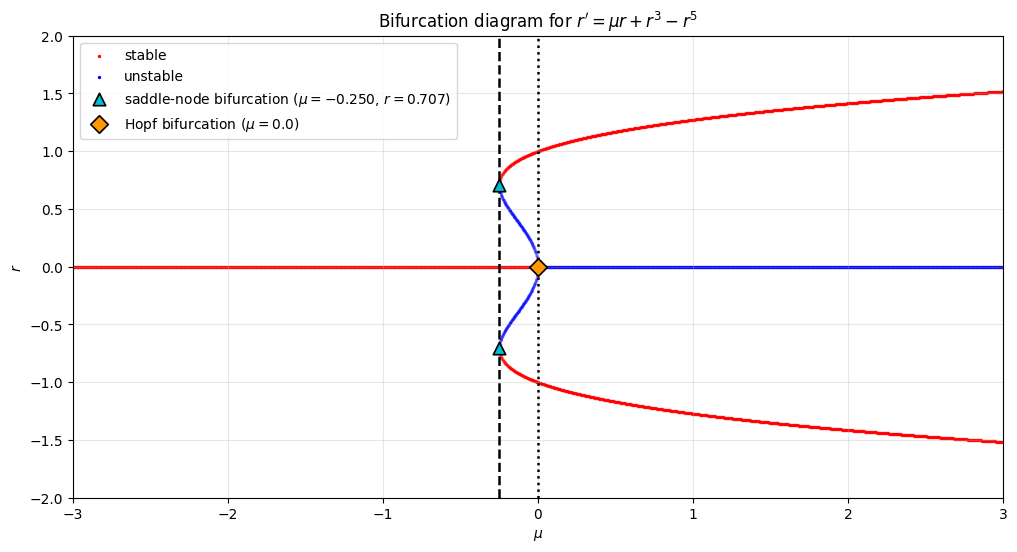

In [20]:
radial.plot_bifurcation_1d(mu_range=(-3, 3), r_range=(-2, 2), n_mu=3000, legend=True, include_negative=True)
plt.show()

**Equilibria and bifurcations:**

- At $\mu = -\tfrac{1}{4}$: **saddle-node bifurcation**. Two equilibria collide at $r =\pm \tfrac{1}{\sqrt{2}}$ and disappear as $\mu$ decreases.
- At $\mu = 0$: **subcritical pitchfork** due to symmetry. The origin changes stability; the small-amplitude nonzero branch is unstable for $\mu < 0$ and terminates at the origin.
- For $-\tfrac{1}{4} < \mu < 0$: unstable inner branch and stable outer branch coexist. Stability determined by $f'(r) = \mu + 3r^2 - 5r^4$.
- For $\mu > 0$: only the stable outer branch survives, and the inner solution becomes imaginary.

**Eigenvalue Analysis**

The eigenvalues determine stability of equilibria, for a circular equilibrium at radius $r_{eq}$, the linearized eigenvalues are:
$$\lambda = (\mu + 3r_{eq}^2 - 5r_{eq}^4) \pm i\omega$$

The real part determines radial stability (attraction/repulsion):


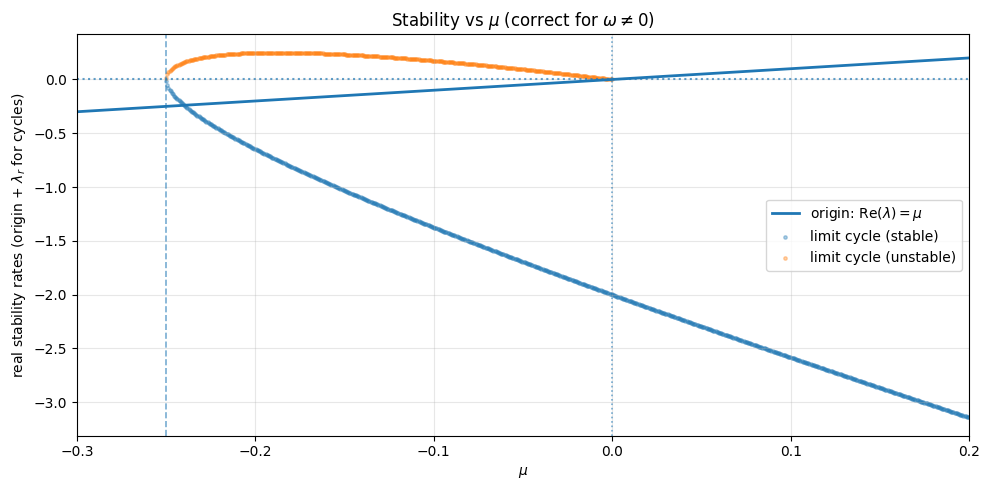

In [19]:
radial.plot_eigenvalues_vs_mu(mu_range=(-0.3, 0.2), n_points=800, omega=1.0)
plt.show()

- **Red dots**: Real part at stable equilibria (always $\leq 0$ → spiraling inward)
- **Blue dots**: Real part at unstable equilibria (always $> 0$ → spiraling outward)
- **Black dotted line**: Stability boundary ($\text{Re}(\lambda) = 0$)

At the bifurcation points ($\mu = -1/4$ and $\mu = 0$), the real parts touch zero and equilibria change stability.


### 2.2) 2D Interpretation: Invariant Circles, Phase Portraits, and the Role of $\dot\theta\neq 0$

**Theory: From 1D to 2D**

In the 1D radial equation $\dot{r} = \mu r + r^3 - r^5$, we analyze equilibria for both positiive and negative values of $r$.

To embed this in a 2D system, we use polar coordinates $(r, \theta)$ with:
- **Radial dynamics**: $\dot{r} = \mu r + r^3 - r^5$ 
- **Angular dynamics**: $\dot{\theta} = \omega$

Converting to **Cartesian coordinates** $(x, y)$ where $r = \sqrt{x^2 + y^2}$:

$$
\begin{align}
\frac{dx}{dt} &= \frac{f(r, \mu)}{r} \cdot x - \omega y \\
\frac{dy}{dt} &= \frac{f(r, \mu)}{r} \cdot y + \omega x
\end{align}
$$

where $f(r, \mu) = \mu r + r^3 - r^5$.

**Physical interpretation**:
- $r = 0$ means a fixed point at the origin no rotation, just equilibrium.
- $r = r_{eq} > 0$ means that we have a **limit cycle**, a circular periodic orbit of radius $r_{eq}$.
- The stability of the limit cycle inherits directly from the 1D stability of $r_{eq}$:
  - If $f'(r_{eq}) < 0$ we have a **stable limit cycle**, where trajectories spiral towards the circle.
  - If $f'(r_{eq}) > 0$ We have a **unstable limit cycle**, where trajectories spiral away from the circle.

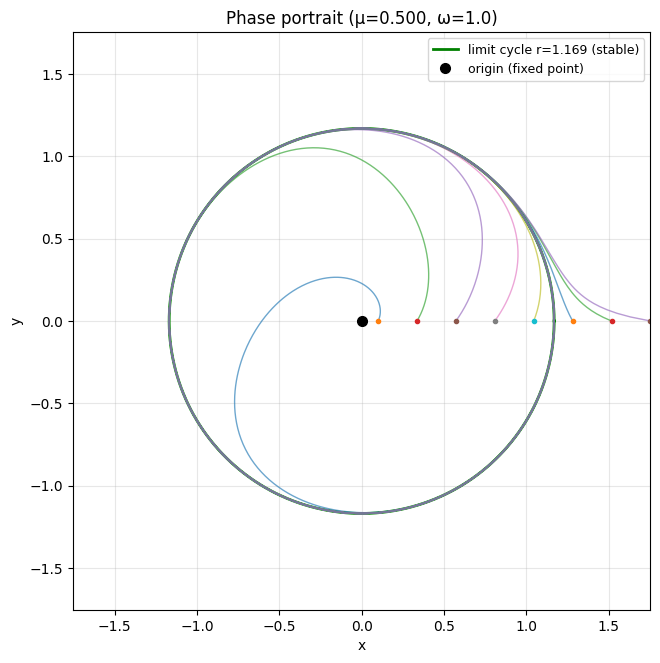

In [23]:
radial.plot_phase_portrait(mu=0.5, omega=1.0, n_trajectories=8, t_max=30)
plt.show()

We'll now visualize the 2D phase portraits for three critical regimes:

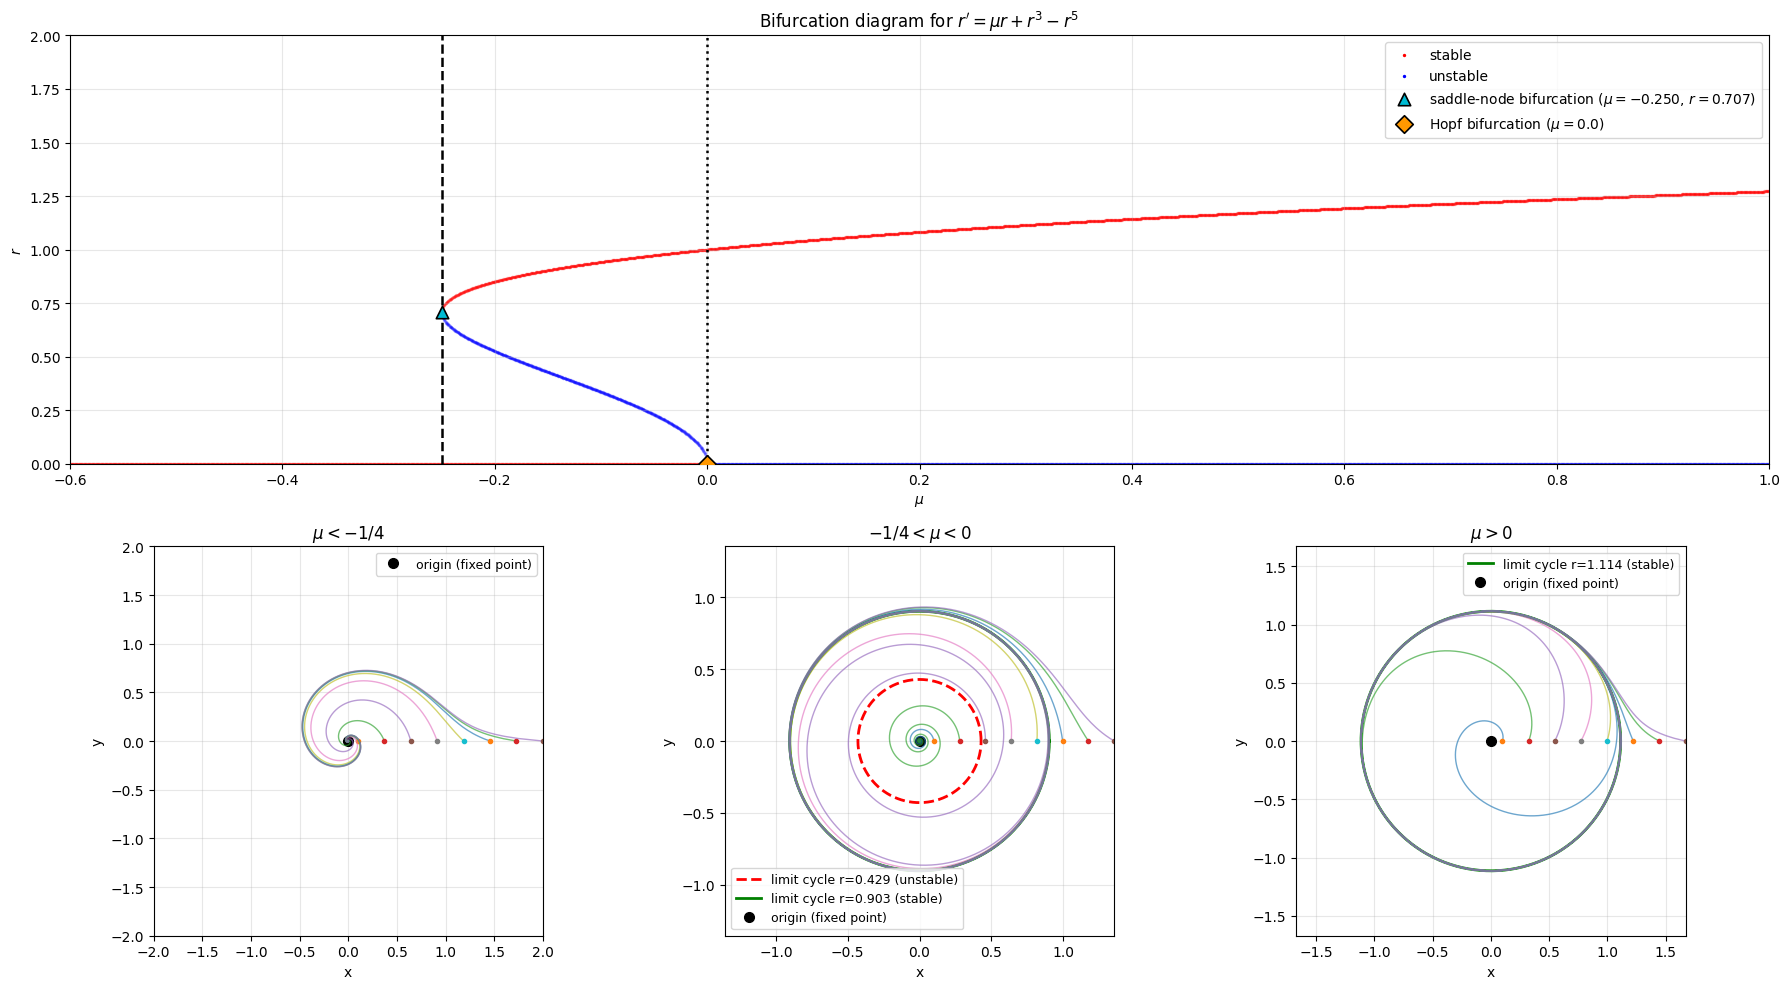

In [22]:
radial.plot_three_regimes()
plt.show()

On the figures above, we see three different cases.

1. **μ < -1/4**: Only the origin exists and is globally stable.
2. **-1/4 < μ < 0**: The origin is stable, two limit cycles emerge.
3. **μ > 0**: The origin is unstable, but stable outer limit cycle exists.

We only show the positive values of r, because $X$ and $Y$ are interpret as real, so by the definition of $r$, it can't be negative.

#### Time Evolution of Radius

Let's visualize how $r(t)$ evolves over time for different initial conditions, showing how trajectories approach stable limit cycles or diverge from unstable ones.

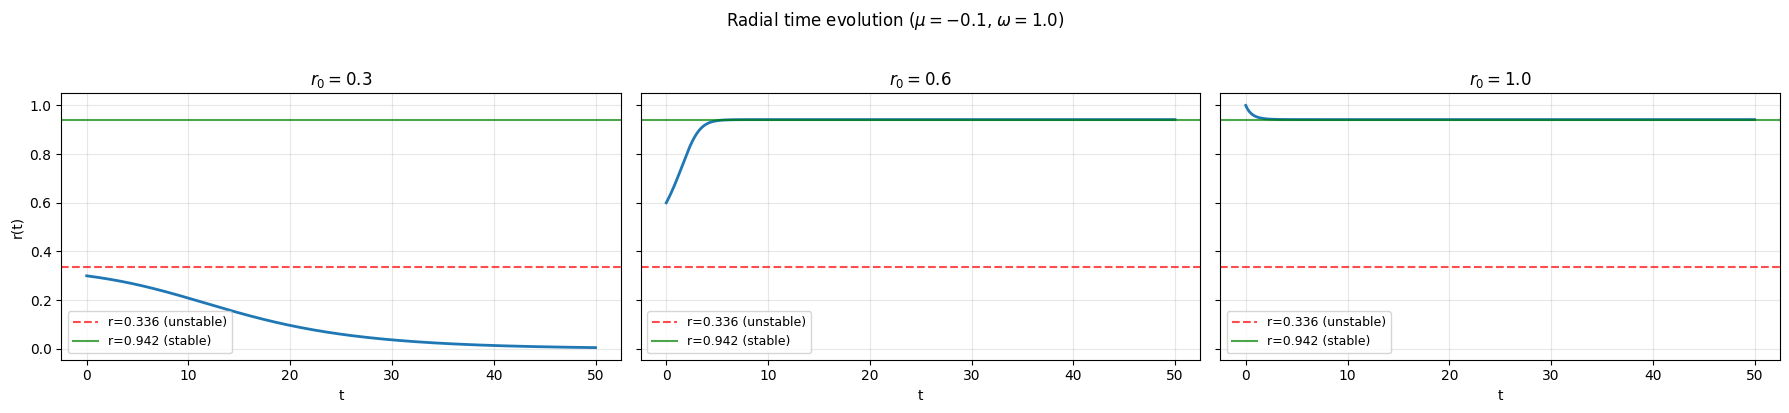

In [24]:
radial.plot_radial_time_subplots(mu=-0.1, initial_radii=[0.3, 0.6, 1.0], omega=1.0, t_max=50)
plt.show()

#### Key Observations

**The role of $\omega \neq 0$:**
- When $\omega = 0$ (no rotation), trajectories would simply move radially inward or outward along straight lines
- With $\omega \neq 0$, trajectories spiral around the origin while simultaneously moving radially
- This creates **circular limit cycles** at the equilibrium radii $r_{eq}$

**Stability behavior:**
- Trajectories starting inside a stable limit cycle spiral **outward** towards it
- Trajectories starting outside a stable limit cycle spiral **inward** towards it  
- Trajectories near an unstable limit cycle spiral **away** from it (either inward or outward depending on initial position)

**The separatrix:**
- In regimes with multiple limit cycles (e.g., $-1/4 < \mu < 0$), the unstable limit cycle acts as a **separatrix**
- It divides the phase space into basins of attraction for different stable equilibria
- Initial conditions inside the unstable circle → spiral to inner stable circle (or origin)
- Initial conditions outside the unstable circle → spiral to outer stable circle


### 2.3) Global Narrative: Stability Regions, Separatrices, and What the System Does in Each Regime

#### Overview of System Behavior

The radial equation $\dot{r} = \mu r + r^3 - r^5 = r(\mu + r^2 - r^4)$ exhibits rich bifurcation behavior as $\mu$ varies. We identify three distinct regimes separated by two critical bifurcation points.

#### Bifurcation analysis


To locate where equilibria appear or disappear, solve $\mu + r^2 - r^4 = 0$ for $r>0$.


Let $u=r^2$. Then $u^2 - u - \mu = 0$ with solutions $u = \dfrac{1 \pm \sqrt{1+4\mu}}{2}$.


Real equilibria require $1+4\mu\ge 0$, i.e. $\mu\ge -\tfrac{1}{4}$.




**Critical bifurcation points**


1. **$\mu = -\tfrac{1}{4}$ (saddle-node)**


   - For $\mu < -\tfrac{1}{4}$: no real positive equilibria other than $r=0$.


   - At $\mu = -\tfrac{1}{4}$: two equilibria collide at $r=\tfrac{1}{\sqrt{2}}$.


   - For $\mu > -\tfrac{1}{4}$: two distinct nonzero equilibria exist.


2. **$\mu = 0$ (subcritical pitchfork at the origin)**


   - Odd symmetry $f(-r,\mu)=-f(r,\mu)$ implies the local normal form $\dot r \approx \mu r + r^3$.


   - The origin changes stability at $\mu=0$; the small-amplitude nonzero branch that exists for $\mu<0$ is unstable and terminates at $\mu=0$.


   - The term $-r^5$ limits growth and, together with $r^3$, produces the saddle-node at $\mu=-\tfrac{1}{4}$.

sample_equilibria() found: 925 stable and 625 unstable equilibria


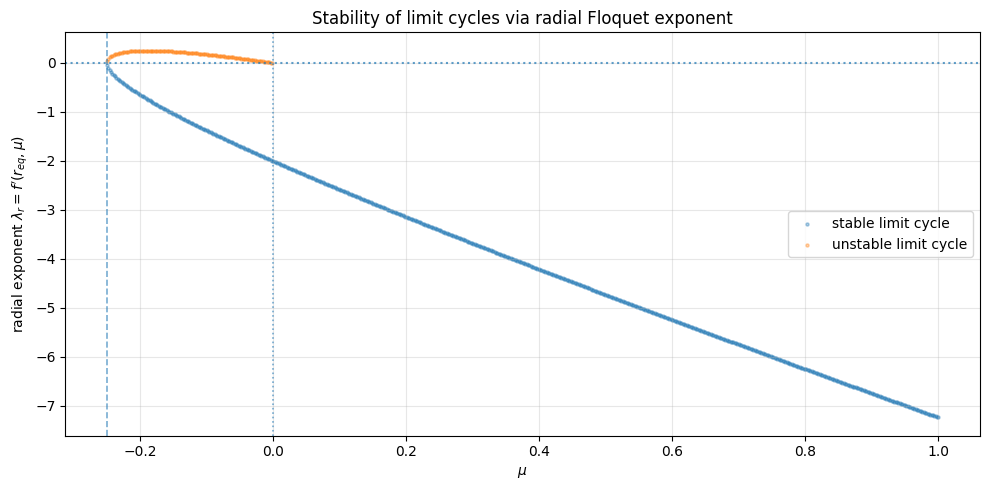

In [7]:
radial.plot_stability_equilibria(mu_range=(-0.6, 1.0), n_mu=800)
plt.show()

#### Regime 1: $\mu < -\frac{1}{4}$ (No nonzero equilibria)

**Equilibria:**
- Only $r = 0$ exists

**Stability:**
- $f'(0) = \mu < 0$ → origin is **stable**

**2D interpretation:**
- The origin is a globally attracting fixed point
- All trajectories spiral inward toward the origin
- No limit cycles exist

**Physical behavior:**
- Regardless of initial conditions, the system always decays to rest at the origin
- The spiral motion is due to $\omega \neq 0$, but the radius decreases monotonically

#### Regime 2: $-\frac{1}{4} < \mu < 0$ (Two nonzero equilibria + origin)

**Equilibria:**
- $r_0 = 0$ (origin)
- $r_{inner} = \sqrt{\frac{1 - \sqrt{1+4\mu}}{2}}$ (inner circle)
- $r_{outer} = \sqrt{\frac{1 + \sqrt{1+4\mu}}{2}}$ (outer circle)

**Stability:**
- $r_0 = 0$: $f'(0) = \mu < 0$ → **stable**
- $r_{inner}$: Check $f'(r_{inner})$ → **unstable** (repelling)
- $r_{outer}$: Check $f'(r_{outer})$ → **stable** (attracting)

**2D interpretation:**
- Three circular invariant sets: stable origin, unstable inner limit cycle, stable outer limit cycle
- The **unstable inner circle acts as a separatrix** dividing phase space into two basins of attraction:
  - **Inner basin**: $r < r_{inner}$ → trajectories spiral toward the origin
  - **Outer basin**: $r > r_{inner}$ → trajectories spiral toward the outer stable limit cycle

**Physical behavior:**
- Initial conditions determine the final state:
  - Start close to origin ($r_0 < r_{inner}$) → decay to rest
  - Start far from origin ($r_0 > r_{inner}$) → approach sustained oscillation on the outer limit cycle
- The unstable circle is a "watershed" - trajectories on either side behave completely differently

#### Regime 3: $\mu > 0$ (one nonzero equilibrium + unstable origin)


**Equilibria:**


- $r_0 = 0$: $f'(0) = \mu > 0$ → unstable origin


- $r_{stable} = \sqrt{\dfrac{1 + \sqrt{1+4\mu}}{2}}$ → stable outer circle


- The inner solution $\sqrt{\dfrac{1 - \sqrt{1+4\mu}}{2}}$ is imaginary (does not exist).




**2D interpretation:**


- The origin becomes a repelling fixed point.


- A single globally attracting limit cycle at radius $r_{stable}$.


- All trajectories (except the origin itself) spiral outward to the stable limit cycle.




**Physical interpretation:**


- Small perturbations from the origin grow.


- Nonlinearity ($-r^5$) limits growth → a stable oscillation.


- This is consistent with a **subcritical Hopf** at $\mu = 0$: small-amplitude cycles are unstable for $\mu<0$ and disappear at $\mu=0$, while a stable, larger-amplitude cycle exists thanks to a saddle-node of cycles for $\mu<0$.

#### Bifurcation Diagram

A bifurcation diagram shows how equilibria change with $\mu$. Let's plot $r_{eq}$ vs $\mu$, with solid lines for stable equilibria and dashed lines for unstable ones.

### Conclusion


Visual takeaways from the figure above (μ on x-axis, r on y-axis):


- Symmetry: the diagram is symmetric in ±r; each positive branch has a mirrored negative branch with identical stability.


- Stability colors: red dots = stable, blue dots = unstable. The origin branch is red for μ < 0 and blue for μ > 0 (stability flips at μ = 0).


- μ = −1/4 (teal triangle, dashed guide): a saddle-node creates a pair of nonzero equilibria at r ≈ ±0.707 (1/√2). For −1/4 < μ < 0 the inner branch is blue (unstable) and bends toward r → 0, while the outer branch is red (stable) and grows with μ.


- μ = 0 (amber diamond, dotted guide): subcritical pitchfork at the origin; the small-amplitude nonzero branch terminates at r = 0 and is unstable. In 2D this corresponds to a subcritical Hopf (origin loses stability at μ = 0).


- Regimes seen in the plot:


  - μ < −1/4: only the origin exists and is stable; trajectories spiral to 0.


  - −1/4 < μ < 0: bistability — stable origin and a stable outer limit cycle coexist, separated by an unstable inner cycle (the separatrix).


  - μ > 0: the origin is unstable and a single stable outer limit cycle attracts all initial radii r0 > 0.

In [81]:
radial.print_cartesian_rhs_demo(mu_demo=-0.1, omega_demo=1.0, state_demo=[1.0, 0.5])

At state (x, y) = (1.000, 0.500) with μ = -0.1, ω = 1.0:
  dx/dt = -0.912500
  dy/dt = 0.793750

Radius r = 1.118034
Radial velocity f(r) = -0.461189
Expected radial component f(r)/r = -0.412500

This confirms cartesian_rhs() correctly implements the 2D system.
